In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/TRIPADVISOR/

/content/drive/MyDrive/TRIPADVISOR


In [3]:
!pwd

/content/drive/MyDrive/TRIPADVISOR


In [4]:
%cd Hotel_Reviews

[Errno 2] No such file or directory: 'Hotel_Reviews'
/content/drive/MyDrive/TRIPADVISOR


In [5]:
import pandas as pd
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

In [6]:
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [7]:
df.drop(columns='Rating',inplace=True)

In [8]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [9]:
!pip install vaderSentiment

In [10]:
df1=df

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
#nltk.download('vader_lexicon')

sentiments = SentimentIntensityAnalyzer()

df1["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df1["Review"]]
df1["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df1["Review"]]
df1["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df1["Review"]]
df1["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in df1["Review"]]

In [12]:
df1['Sentiment'] = df1['Compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')

In [13]:
df1.drop(columns='Positive',inplace=True)

In [14]:
df1.drop(columns='Negative',inplace=True)

In [15]:
df1.drop(columns='Compound',inplace=True)

In [16]:
df1.drop(columns='Neutral',inplace=True)

In [17]:
df2=df1[df1['Sentiment']!='neutral']

In [18]:
df2['Sentiment'].value_counts()

Sentiment
positive    18934
negative     1544
Name: count, dtype: int64

In [19]:
df2['Sentiment'].replace({'positive':1,'negative':0},inplace=True)

<ipython-input-19-7baa5b2452c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Sentiment'].replace({'positive':1,'negative':0},inplace=True)


In [20]:
df2

,Review,Sentiment
0,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,1
2,nice rooms not 4* experience hotel monaco seat...,1
3,"unique, great stay, wonderful time hotel monac...",1
4,"great stay great stay, went seahawk game aweso...",1
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",1
20487,great location price view hotel great quick pl...,1
20488,"ok just looks nice modern outside, desk staff ...",1
20489,hotel theft ruined vacation hotel opened sept ...,1


In [21]:
import nltk
import string
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words_list = stopwords.words("english")

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"\d", " ", text)
    text = re.sub(r"<.*?>+", "", text)
    text = re.sub(r"\[.*?\]", "", text)
    text = re.sub(r"https?://S+|www.\.\S+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.split()
    words = [word for word in words if not word in stop_words_list]
    words = [re.sub(r"(.)\1{1,}", r"\1\1", word) for word in words]
    words = [word.strip() for word in words if len(word.strip()) > 1]
    text = " ".join(words)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
df2["Review"] = df2["Review"].apply(preprocess_text)

<ipython-input-22-d70de6f680de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Review"] = df2["Review"].apply(preprocess_text)


In [23]:
df2['Review'] = df2['Review'].str.replace('[^\w\s]','')
print(df['Review'])

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4* experience hotel monaco seat...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm, not 5...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside, desk staff ...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, ca n't believe excellent ratin...
Name: Review, Length: 20491, dtype: object


<ipython-input-23-2c609a5d10fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Review'] = df2['Review'].str.replace('[^\w\s]','')


In [24]:
import nltk
nltk.download('punkt')

df2['Review'] = df.apply(lambda row: nltk.word_tokenize(row['Review']), axis=1)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-24-de03ef846a2b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Review'] = df.apply(lambda row: nltk.word_tokenize(row['Review']), axis=1)


In [25]:
df2

,Review,Sentiment
0,"[nice, hotel, expensive, parking, got, good, d...",1
1,"[ok, nothing, special, charge, diamond, member...",1
2,"[nice, rooms, not, 4, *, experience, hotel, mo...",1
3,"[unique, ,, great, stay, ,, wonderful, time, h...",1
4,"[great, stay, great, stay, ,, went, seahawk, g...",1
...,...,...
20486,"[best, kept, secret, 3rd, time, staying, charm...",1
20487,"[great, location, price, view, hotel, great, q...",1
20488,"[ok, just, looks, nice, modern, outside, ,, de...",1
20489,"[hotel, theft, ruined, vacation, hotel, opened...",1


In [26]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
from nltk.corpus import stopwords # stop words in sentences

stop_words = set(stopwords.words('english'))

In [28]:
df2['Review'] = df2['Review'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print(df.head(20))

                                               Review Sentiment
0   nice hotel expensive parking got good deal sta...  positive
1   ok nothing special charge diamond member hilto...  positive
2   nice rooms not 4* experience hotel monaco seat...  positive
3   unique, great stay, wonderful time hotel monac...  positive
4   great stay great stay, went seahawk game aweso...  positive
5   love monaco staff husband stayed hotel crazy w...  positive
6   cozy stay rainy city, husband spent 7 nights m...  positive
7   excellent staff, housekeeping quality hotel ch...  positive
8   hotel stayed hotel monaco cruise, rooms genero...  positive
9   excellent stayed hotel monaco past w/e delight...  positive
10  poor value stayed monaco seattle july, nice ho...  positive
11  nice value seattle stayed 4 nights late 2007. ...  positive
12  nice hotel good location hotel kimpton design ...  positive
13  nice hotel not nice staff hotel lovely staff q...  negative
14  great hotel night quick business tri

<ipython-input-28-da171dae9852>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Review'] = df2['Review'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))


In [29]:
df2['Review'] = df2['Review'].str.strip()

df2['Review']= df2['Review'].str.lower()


<ipython-input-29-146d94b1a8ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Review'] = df2['Review'].str.strip()
<ipython-input-29-146d94b1a8ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Review']= df2['Review'].str.lower()


In [30]:
X=df2['Review']
y=df2['Sentiment']

In [31]:

df2['Sentiment'].unique()

array([1, 0])

In [32]:
from sklearn.preprocessing import LabelEncoder

# calling the label encoder function
label_encoder = LabelEncoder()

# Encode labels in column 'sentiment'.
df2['Sentiment']= label_encoder.fit_transform(df2['Sentiment'])

df2['Sentiment'].unique()




<ipython-input-32-69cd95fbc5b9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Sentiment']= label_encoder.fit_transform(df2['Sentiment'])


array([1, 0])

In [33]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**SVM**


In [34]:
#SVM
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', min_df=0.0001)

In [35]:
#SVM
from sklearn import metrics
cv = CountVectorizer()
X_scaled = cv.fit_transform(X)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)
from sklearn import svm
svm_class= svm.SVC()
svm_class.fit(X_train,y_train)
y_pred=svm_class.predict(X_test)
Accuracy_Svm=round((metrics.accuracy_score(y_test, y_pred)*100),2)
print('Accuracy: ',Accuracy_Svm,"%")

Accuracy:  94.09 %


In [36]:
import numpy as np
from sklearn.metrics import classification_report
unique_classes = np.unique(np.concatenate((y_test, y_pred)))

print(classification_report(y_test, y_pred, target_names=[f'class {i}' for i in unique_classes]))

              precision    recall  f1-score   support

     class 0       0.92      0.26      0.41       477
     class 1       0.94      1.00      0.97      5667

    accuracy                           0.94      6144
   macro avg       0.93      0.63      0.69      6144
weighted avg       0.94      0.94      0.93      6144



**KNN**

In [37]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_class=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
knn_class.fit(X_train,y_train)
y_pred=knn_class.predict(X_test)
Accuracy_Knn=round((metrics.accuracy_score(y_test, y_pred)*100),2)
print('Accuracy: ',Accuracy_Knn,"%")


Accuracy:  92.2 %


In [38]:
import numpy as np
from sklearn.metrics import classification_report
unique_classes = np.unique(np.concatenate((y_test, y_pred)))

print(classification_report(y_test, y_pred, target_names=[f'class {i}' for i in unique_classes]))

              precision    recall  f1-score   support

     class 0       0.48      0.04      0.08       477
     class 1       0.93      1.00      0.96      5667

    accuracy                           0.92      6144
   macro avg       0.70      0.52      0.52      6144
weighted avg       0.89      0.92      0.89      6144



NAIVE **BAYES**

In [39]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
NB=MultinomialNB()
NB.fit(X_train,y_train)
y_pred=NB.predict(X_test)
Accuracy_NB=round((metrics.accuracy_score(y_test, y_pred)*100),2)
print('Accuracy: ',Accuracy_NB,"%")



Accuracy:  93.52 %


In [40]:
import numpy as np
from sklearn.metrics import classification_report
unique_classes = np.unique(np.concatenate((y_test, y_pred)))

print(classification_report(y_test, y_pred, target_names=[f'class {i}' for i in unique_classes]))

              precision    recall  f1-score   support

     class 0       0.67      0.33      0.44       477
     class 1       0.95      0.99      0.97      5667

    accuracy                           0.94      6144
   macro avg       0.81      0.66      0.70      6144
weighted avg       0.92      0.94      0.93      6144



**ANN**

In [41]:
from keras.utils import to_categorical

y=to_categorical(df2.Sentiment)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [43]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist

all_words=' '.join(X_train)
all_words=word_tokenize(all_words)
dist=FreqDist(all_words)
num_unique_word=len(dist)
num_unique_word # initial value to use for hyperparameterization

74426

In [44]:
MAX_REVIEW_LEN=0
for text in X_train:
    word=word_tokenize(text)
    l=len(word)
    MAX_REVIEW_LEN = max(MAX_REVIEW_LEN, l)

MAX_REVIEW_LEN

2146

In [45]:
max_features = num_unique_word # find total number of unique words using word_tokenize
max_words = MAX_REVIEW_LEN  # find maximum length of words using word_tokenize
batch_size = 32
epochs = 10
num_classes=2

In [46]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_test)
#X_test = tokenizer.texts_to_sequences(test_text)

In [47]:
import tensorflow as tf
X_train =  tf.keras.utils.pad_sequences(X_train, maxlen=max_words)
X_val =  tf.keras.utils.pad_sequences(X_val, maxlen=max_words)
#X_test =  tf.keras.utils.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_val.shape)

(16382, 2146) (4096, 2146)


In [48]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=(2146)))
model.add(Dense(units=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, verbose=1)


Epoch 1/50
512/512 [==============================] - 4s 3ms/step - loss: 51.3380 - accuracy: 0.8882
Epoch 2/50
512/512 [==============================] - 2s 3ms/step - loss: 3.5642 - accuracy: 0.9082
Epoch 3/50
512/512 [==============================] - 2s 5ms/step - loss: 0.8847 - accuracy: 0.9189
Epoch 4/50
512/512 [==============================] - 2s 5ms/step - loss: 0.4584 - accuracy: 0.9239
Epoch 5/50
512/512 [==============================] - 2s 4ms/step - loss: 0.3411 - accuracy: 0.9258
Epoch 6/50
512/512 [==============================] - 2s 3ms/step - loss: 0.2753 - accuracy: 0.9267
Epoch 7/50
512/512 [==============================] - 2s 3ms/step - loss: 0.2690 - accuracy: 0.9261
Epoch 8/50
512/512 [==============================] - 2s 3ms/step - loss: 0.2661 - accuracy: 0.9256
Epoch 9/50
512/512 [==============================] - 2s 3ms/step - loss: 0.2562 - accuracy: 0.9264
Epoch 10/50
512/512 [==============================] - 2s 3ms/step - loss: 0.2767 - accuracy: 0.926

In [49]:
loss, accuracy = model.evaluate(X_val, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Testing Accuracy:  0.9258


In [50]:
model_json=model.to_json()
with open("model.json","w") as json_file:
     json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [51]:
import tensorflow
from tensorflow.keras.models import model_from_json
json_file1=open('model.json','r')
loaded_model_json=json_file1.read()
json_file1.close()
loaded_model=model_from_json(loaded_model_json)

loaded_model.load_weights("model.h5")

print("Loaded model from disk")
loaded_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
score=loaded_model.evaluate(X_val,y_test,verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1],score[1]*100))

Loaded model from disk
accuracy: 92.58%


DATA **VISUALIZATION**

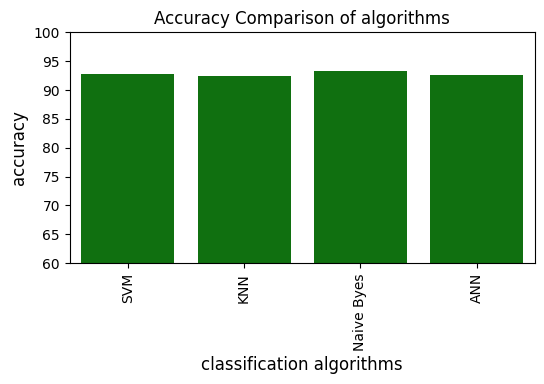

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,3))
acc=[92.68,92.4,93.23,92.58]
alg=['SVM','KNN','Naive Byes','ANN']
plt.ylim(60,100)
sns.barplot(x=alg, y=acc,color='green')
plt.xticks(rotation='vertical')
plt.xlabel('classification algorithms', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.title("Accuracy Comparison of algorithms")
plt.show()

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

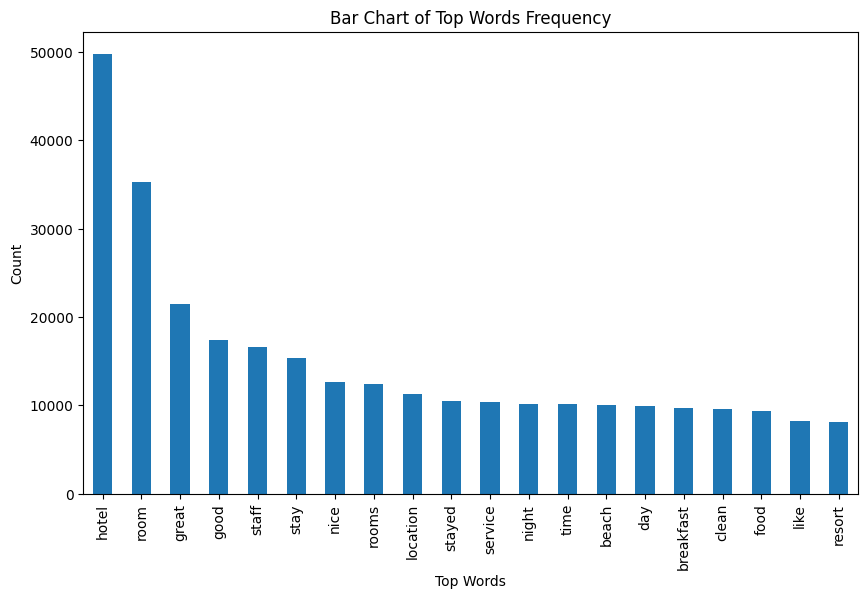

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
  vec = CountVectorizer().fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx])
        for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key=lambda x: x[1],
            reverse=True)
  return words_freq[:n]


common_words = get_top_n_words(df2['Review'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(kind='bar',figsize=(10, 6), xlabel="Top Words", ylabel="Count", title="Bar Chart of Top Words Frequency")

**EDA**

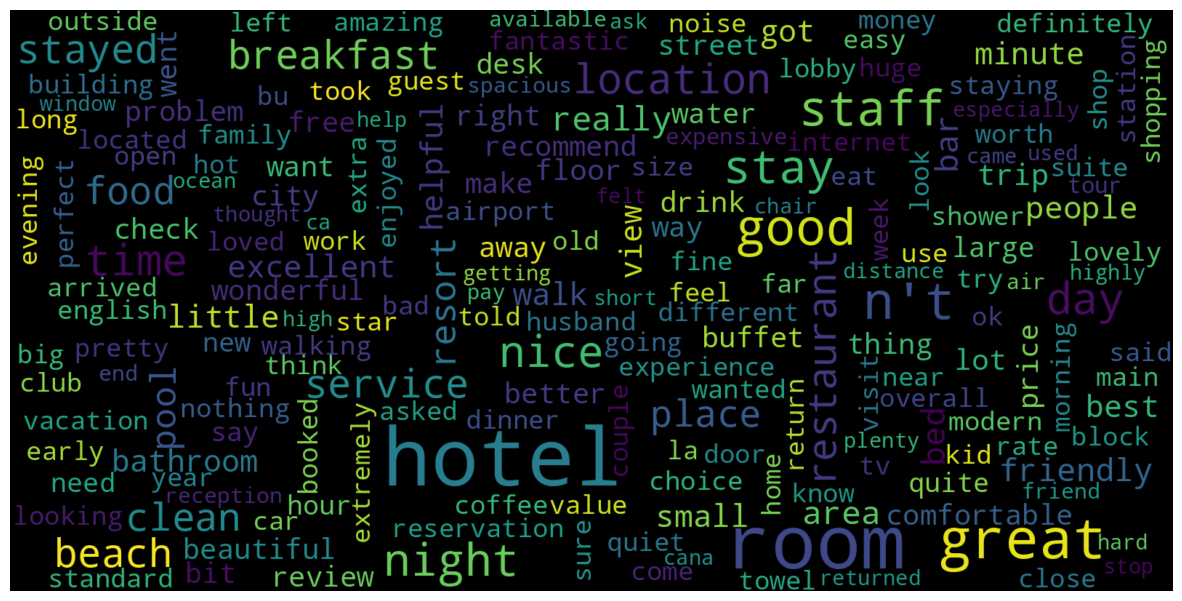

In [54]:
#good review
from wordcloud import WordCloud

consolidated = ' '.join(word for word in df2['Review'][df2['Sentiment'] == 1].astype(str))
wordCloud = WordCloud(width=1600,height=800,random_state=21,max_font_size=110,collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

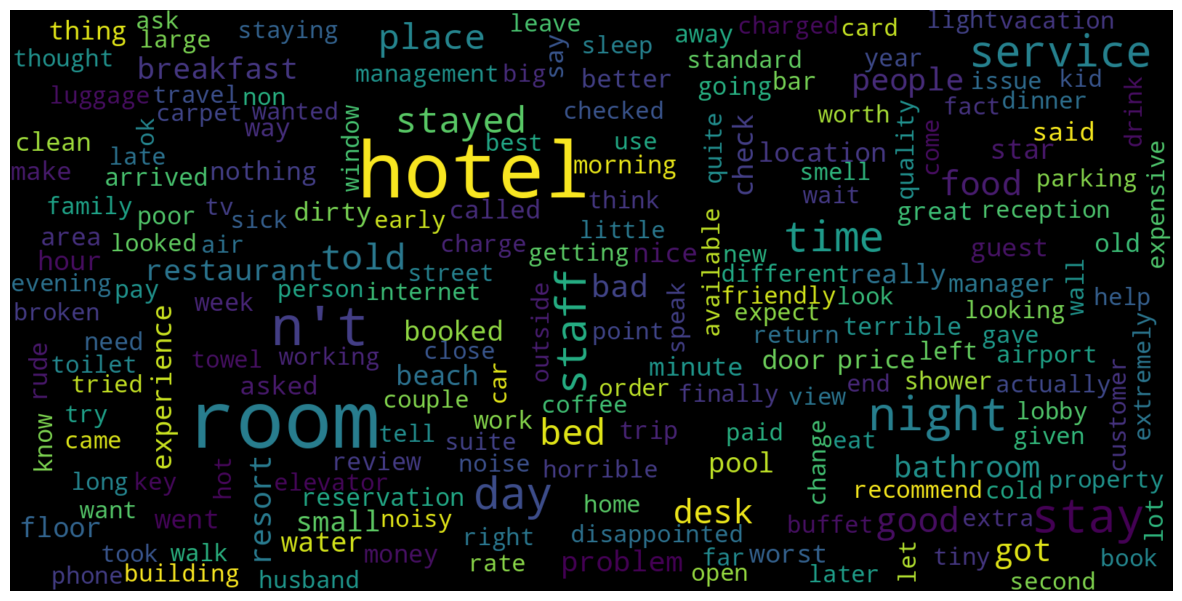

In [55]:
#bad review
from wordcloud import WordCloud

consolidated = ' '.join(word for word in df2['Review'][df2['Sentiment'] == 0].astype(str))
wordCloud = WordCloud(width=1600,height=800,random_state=21,max_font_size=110,collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

TEXT **PREDICTION**

In [56]:
new_review = [["good choice hotel recommended sister , great location room nice , comfortable bed- quiet- staff helpful recommendations restaurants , pike market 4 block walk , stay ,"]]
new_review_df= pd.DataFrame(new_review, columns = ['new_review'])
new_review_df



,new_review
0,"good choice hotel recommended sister , great l..."


In [57]:
new_review_df['new_review']=new_review_df['new_review'].apply(preprocess_text)
new_review_df


,new_review
0,good choice hotel recommended sister great loc...


In [60]:
newText = df2['Review']
new_merged_series = pd.concat([newText, new_review_df['new_review']], ignore_index=True)
new_merged_series

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms 4 * experience hotel monaco seattle...
3        unique , great stay , wonderful time hotel mon...
4        great stay great stay , went seahawk game awes...
                               ...                        
20474    great location price view hotel great quick pl...
20475    ok looks nice modern outside , desk staff n't ...
20476    hotel theft ruined vacation hotel opened sept ...
20477    people talking , ca n't believe excellent rati...
20478    good choice hotel recommended sister great loc...
Length: 20479, dtype: object

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
new_scaled = cv.fit_transform(new_merged_series)

#prediction
new_prediction = NB.predict(new_scaled[-1])
print(new_prediction)
if new_prediction[0]==1:
  print("It is a positive review")
else:
  print("It is not a positive review")

[1]
It is a positive review


In [62]:
new_review = [["warwick bad good reviews warwick shocks staff quite rude rooms fairly dirty , cut asked bandaid , requested bottle opener better service ,"]]
new_review_df= pd.DataFrame(new_review, columns = ['new_review'])
new_review_df

,new_review
0,warwick bad good reviews warwick shocks staff ...


In [63]:
new_review_df['new_review']=new_review_df['new_review'].apply(preprocess_text)
new_review_df


,new_review
0,warwick bad good reviews warwick shocks staff ...


In [65]:
newText = df2['Review']
new_merged_series = pd.concat([newText, new_review_df['new_review']], ignore_index=True)
new_merged_series

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms 4 * experience hotel monaco seattle...
3        unique , great stay , wonderful time hotel mon...
4        great stay great stay , went seahawk game awes...
                               ...                        
20474    great location price view hotel great quick pl...
20475    ok looks nice modern outside , desk staff n't ...
20476    hotel theft ruined vacation hotel opened sept ...
20477    people talking , ca n't believe excellent rati...
20478    warwick bad good reviews warwick shocks staff ...
Length: 20479, dtype: object

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
new_scaled = cv.fit_transform(new_merged_series)

#prediction
new_prediction = NB.predict(new_scaled[-1])
print(new_prediction)
if new_prediction[0]==1:
  print("It is a positive review")
else:
  print("It is not a positive review")

[0]
It is not a positive review
